<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/tito/itgetslikethat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

Dataset Paths

In [52]:
train_path = "/content/drive/MyDrive/archive (1)/train/train"
test_path = "/content/drive/MyDrive/archive (1)/test/test"

epochs = 5
batch_size = 32
num_of_train_samples = 16854
num_of_test_samples = 5641

Creating training and test data

In [28]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

Importing data into generators

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 16854 images belonging to 33 classes.
Found 0 images belonging to 0 classes.


In [34]:
train_data = pd.read_csv('/content/drive/MyDrive/archive (1)/sampleSubmission.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

Xception Model

In [53]:
model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
#x = Dropout(.3)(x)
predictions = Dense(33, activation="softmax")(x)
model_final = Model(model.input, predictions)

model_final.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model_final.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [13]:
for layer in model_final.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f60f61c0550> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f60f61c0910> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5f90c66490> False
<keras.layers.core.activation.Activation object at 0x7f60f61c0dd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f5f90c6d310> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f60f61d6950> False
<keras.layers.core.activation.Activation object at 0x7f60f61d67d0> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f5f90d879d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5f90ecc050> False
<keras.layers.core.activation.Activation object at 0x7f5f90ecc1d0> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f5f90c8ee90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f

Xception


In [54]:
checkpoint = ModelCheckpoint("xception", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model_final.fit(train_generator,                   
                                    steps_per_epoch=batch_size,
                                    validation_data=test_generator,                    
                                    validation_steps=10,
                                    epochs=epochs,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/5
32/32 [==============================] - ETA: 0s - loss: 2.9434 - accuracy: 0.2842
Epoch 1: loss improved from inf to 2.94338, saving model to xception


32/32 [==============================] - 49s 1s/step - loss: 2.9434 - accuracy: 0.2842
Epoch 2/5
32/32 [==============================] - ETA: 0s - loss: 1.7319 - accuracy: 0.4883
Epoch 2: loss improved from 2.94338 to 1.73195, saving model to xception


32/32 [==============================] - 47s 1s/step - loss: 1.7319 - accuracy: 0.4883
Epoch 3/5
32/32 [==============================] - ETA: 0s - loss: 1.2568 - accuracy: 0.6230
Epoch 3: loss improved from 1.73195 to 1.25684, saving model to xception


32/32 [==============================] - 46s 1s/step - loss: 1.2568 - accuracy: 0.6230
Epoch 4/5
32/32 [==============================] - ETA: 0s - loss: 1.0117 - accuracy: 0.6787
Epoch 4: loss improved from 1.25684 to 1.01166, saving model to xception


32/32 [==============================] - 45s 1s/step - loss: 1.0117 - accuracy: 0.6787
Epoch 5/5
32/32 [==============================] - ETA: 0s - loss: 0.7732 - accuracy: 0.7598
Epoch 5: loss improved from 1.01166 to 0.77316, saving model to xception


32/32 [==============================] - 44s 1s/step - loss: 0.7732 - accuracy: 0.7598


Plot Xception

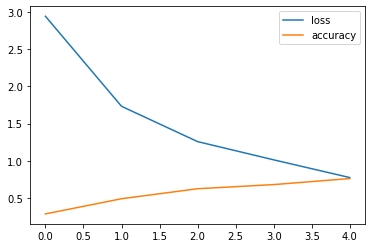

In [55]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
#plt.plot(hist.history["val_loss"])
#plt.plot(hist.history["val_accuracy"])
plt.legend(["loss", "accuracy"])
plt.show()

In [56]:
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
target_names = ['Apple Braeburn',
'Apple Granny Smith',
'Apricot',
'Avocado',
'Banana',
'Blueberry',
'Cactus fruit',
'Cantaloupe',
'Cherry',
'Clementine',
'Corn',
'Cucumber RIpe',
'Grape blue',
'Kiwi',
'Lemon',
'Limes',
'Mango',
'Onion White',
'Orange',
'Papaya',
'Passion fruit',
'Peach',
'Pear',
'Pepper Green',
'Pepper Red',
'Pineapple',
'Plum',
'Pomegranate',
'Potato Red',
'Raspberry',
'Strawberry',
'Tomato',
'Watermelon']

In [72]:
Sequence = keras.utils.Sequence
import tensorflow.keras as keras

Y_pred = model.predict_generator(test_datagen, steps = num_of_test_samples // batch_size+1)

#predict = model.predict_generator(test_generator,steps = 
                                  # np.ceil(nb_samples/desired_batch_size))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(train_datagen.classes, y_pred))
print('Classification Report')
print(classification_report(train_datagen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


ValueError: ignored